In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report
import pickle

In [2]:
df = pd.read_csv('Content\semi_final_data.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_17140\3055060685.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Content\semi_final_data.csv')


,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,meanAirTemp,...,meanHumid,Rainfall,GridPosition,Position,raceStintsNums,TyreAge,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps
0,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,GIO,2,97.066,Qualifying,22.596296,...,61.651852,0.0,14,16,2,1.0,28,27,5.554,55
1,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,RAI,2,97.555,Qualifying,22.893023,...,58.381395,0.0,15,12,2,NaN,12,43,5.554,55
2,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,GIO,1,97.066,Qualifying,23.440741,...,52.511111,0.0,14,16,1,1.0,1,27,5.554,55
3,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,1,97.555,Qualifying,23.560000,...,51.660000,0.0,15,12,1,1.0,1,10,5.554,55
4,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,2,97.555,Qualifying,23.400000,...,51.700000,0.0,15,12,2,NaN,11,1,5.554,55


In [61]:
df.shape

(4611, 21)

In [62]:
print(df['Team'].value_counts(),"\n")
print(df['Compound'].value_counts())

Team
Williams             483
Mercedes             477
Red Bull Racing      474
Ferrari              460
Haas F1 Team         459
McLaren              458
Alfa Romeo Racing    321
Renault              270
AlphaTauri           258
Racing Point         224
Toro Rosso           201
Aston Martin         173
Alpine               163
Sauber                91
Force India           55
Alfa Romeo            44
Name: count, dtype: int64 

Compound
MEDIUM          1495
SOFT            1272
HARD             943
INTERMEDIATE     262
SUPERSOFT        228
ULTRASOFT        224
WET               90
HYPERSOFT         66
UNKNOWN           31
Name: count, dtype: int64


Here in Target('Compounds') Column to remove unknown values which are not labelled properly

In [63]:
df = df.drop(i for i in range(0,len(df)) if df.loc[i,'Compound'] == 'UNKNOWN')
df.reset_index(drop=True,inplace=True)

In [64]:
Rb = df.copy()

Dropping the rows which are other than the RedBull Racing Team

In [65]:
Rb = Rb.drop(i for i in range(0,len(Rb)) if (Rb.loc[i,'Team'] != 'Red Bull Racing'))
Rb.reset_index(drop=True,inplace=True)

In [66]:
Rb.shape

(473, 21)

Dropping all the rows where their Strategies are Failed ❌

the data which are finished with position above 10 have no scoring points in "Formula 1"

In [67]:
rows_to_drop = []

for i in range(0,len(Rb)) :
    if(Rb.loc[i,'Position'] >= 10) :
        rows_to_drop.append(i)
        
Rb.drop(rows_to_drop,inplace=True)

In [68]:
print(Rb.shape)
Rb.reset_index(drop=True,inplace=True)

(383, 21)


In [69]:
Rb.iloc[[4]]

,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,meanAirTemp,...,meanHumid,Rainfall,GridPosition,Position,raceStintsNums,TyreAge,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps
4,Abu Dhabi Grand Prix,21,2018,Red Bull Racing,HYPERSOFT,RIC,2,95.401,Qualifying,27.4,...,65.2,0.0,5,4,2,34.0,49,1,5.554,55


Including Strategies plans of Other than RedBull Teams which have succeed ✔️

becuz, Succeed Teams must be planned Best Strategies

In [70]:
for i in range(0,len(df)) :
    if (df.loc[i,'Position'] <= 4):
        Rb = pd.concat([Rb, df.loc[[i]]], ignore_index=True)

In [71]:
for i in range(0,len(df)) :
    if (df.loc[i,'Rainfall'] > 0):
        Rb = pd.concat([Rb, df.loc[[i]]], ignore_index=True)

In [72]:
Rb = Rb.drop_duplicates()
Rb.reset_index(drop=True,inplace=True)
# Rb.to_csv('RedBull_data.csv')
Rb.shape

(1451, 21)

In [73]:
Rb.columns

Index(['EventName', 'RoundNumber', 'eventYear', 'Team', 'Compound', 'Driver',
       'Stint', 'bestPreRaceTime', 'bestLapTimeIsFrom', 'meanAirTemp',
       'meanTrackTemp', 'meanHumid', 'Rainfall', 'GridPosition', 'Position',
       'raceStintsNums', 'TyreAge', 'lapNumberAtBeginingOfStint', 'StintLen',
       'CircuitLength', 'designedLaps'],
      dtype='object')

Some of columns have Non Integer type values 

Non int type cols are = {'EventName' , 'Compound', 'Driver'}

In [74]:
Rb['EventName'].value_counts()

EventName
Monaco Grand Prix            152
German Grand Prix            135
Spanish Grand Prix           102
Hungarian Grand Prix          81
Bahrain Grand Prix            79
Russian Grand Prix            75
British Grand Prix            71
Emilia Romagna Grand Prix     68
Italian Grand Prix            58
Abu Dhabi Grand Prix          53
Belgian Grand Prix            51
Azerbaijan Grand Prix         47
Austrian Grand Prix           45
United States Grand Prix      36
Chinese Grand Prix            35
Canadian Grand Prix           33
Australian Grand Prix         27
Eifel Grand Prix              27
Portuguese Grand Prix         26
Mexican Grand Prix            25
Turkish Grand Prix            25
French Grand Prix             25
Tuscan Grand Prix             24
Japanese Grand Prix           21
São Paulo Grand Prix          21
Brazilian Grand Prix          20
Singapore Grand Prix          20
Dutch Grand Prix              15
Sakhir Grand Prix             13
Qatar Grand Prix              12


Labelling all the String values into integer by LabelEncoder( )

In [75]:
CircuitEncod = LabelEncoder()
Rb['EventName'] = CircuitEncod.fit_transform(Rb['EventName'])

Labelling Features ('X') and Target ('Y')

In [77]:
X = Rb.drop(columns=['RoundNumber', 'eventYear', 'Team', 'Compound', 'Driver','Position',
       'bestPreRaceTime','bestLapTimeIsFrom','raceStintsNums', 'TyreAge', 'StintLen','CircuitLength', 'designedLaps'])

Y = Rb.Compound

In [146]:
X.head()

,EventName,Stint,meanAirTemp,meanTrackTemp,meanHumid,Rainfall,GridPosition,lapNumberAtBeginingOfStint
0,0,2,22.908889,26.611111,58.248889,0.0,5,11
1,0,2,22.911111,26.628889,58.204444,0.0,1,11
2,0,1,23.560000,28.930000,51.620000,0.0,1,1
3,0,1,23.560000,28.910000,51.650000,0.0,5,1
4,0,2,27.400000,28.300000,65.200000,0.0,5,49


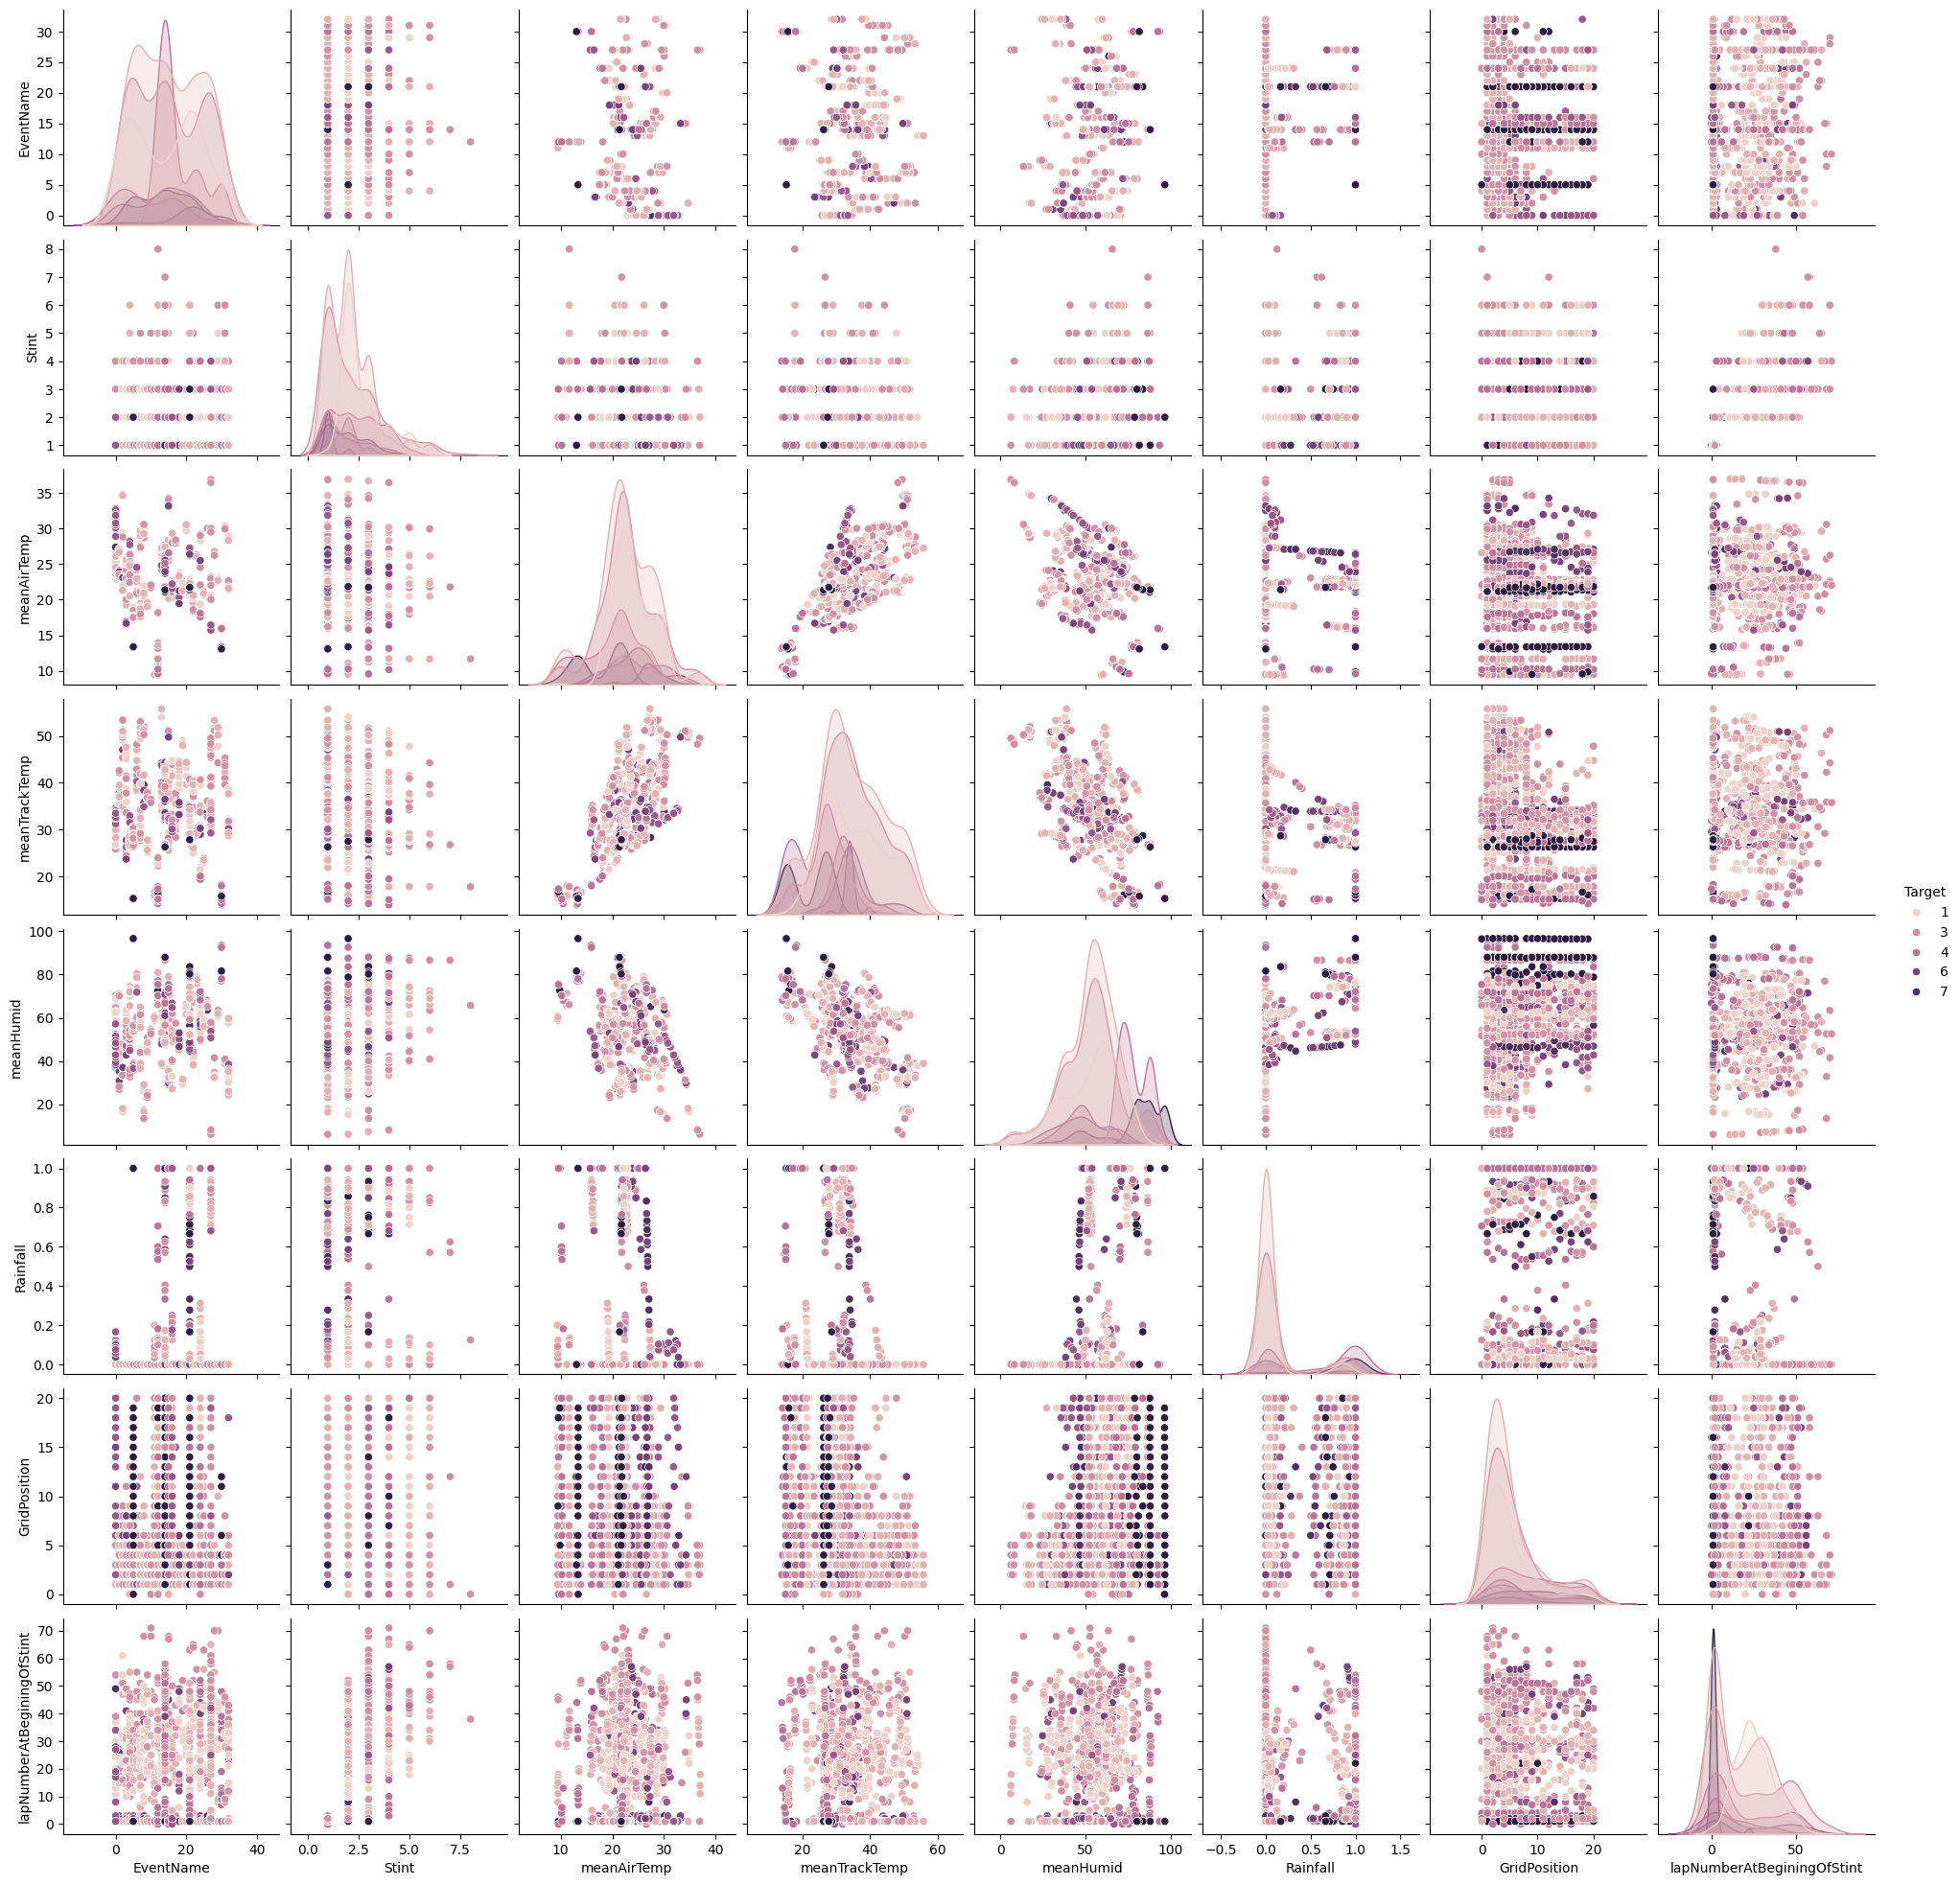

In [154]:
plt.style.use('default')
X_copy = X.copy()
X_copy['Target'] = Y
sns.pairplot(X_copy,hue='Target')

By Observing the plots we cannot use "Regression model" or "SVM" or "K-Means", Since the Classification Data Points are not clearly seperated

In [84]:
Y.value_counts()

Compound
MEDIUM          436
SOFT            363
HARD            257
INTERMEDIATE    161
ULTRASOFT        72
SUPERSOFT        70
WET              69
HYPERSOFT        23
Name: count, dtype: int64

Labelling all The Target ("Compound" (str)) with Integer values

In [85]:
Y[Y == 'HARD'] = 1
Y[Y == 'MEDIUM'] = 2
Y[Y == 'SOFT'] = 3
Y[Y == 'INTERMEDIATE'] = 4
Y[Y == 'SUPERSOFT'] = 5
Y[Y == 'ULTRASOFT'] = 6
Y[Y == 'HYPERSOFT'] = 7
Y[Y == 'WET'] = 8

C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_18668\1230993822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'HARD'] = 1
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_18668\1230993822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'MEDIUM'] = 2
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_18668\1230993822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'SOFT'] = 3
C:\Users\R.

In [148]:
Y = Y.astype('int')

Splitting the Dataset into Training and Testing Data

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.1)

In [105]:
model2 = RandomForestClassifier()
model2.fit(X_train,Y_train)

RandomForestClassifier()

In [106]:
y_pred = model2.predict(X_test)
y_pred

array([2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 1, 2, 2, 2, 4, 2, 3, 3, 5, 2,
       2, 1, 2, 1, 2, 3, 6, 2, 2, 1, 1, 2, 4, 3, 5, 2, 4, 1, 7, 2, 1, 1,
       2, 2, 2, 3, 2, 2, 3, 2, 8, 3, 1, 3, 2, 3, 2, 2, 1, 2, 2, 5, 3, 1,
       2, 3, 2, 1, 2, 6, 2, 1, 2, 1, 1, 2, 5, 3, 3, 2, 3, 2, 8, 1, 4, 3,
       3, 1, 3, 2, 5, 2, 2, 1, 3, 2, 3, 3, 3, 2, 4, 3, 4, 2, 2, 2, 3, 1,
       6, 1, 4, 2, 4, 1, 1, 2, 1, 4, 4, 2, 5, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       4, 1, 1, 4, 2, 7, 2, 1, 2, 1, 8, 8, 3, 6])

In [107]:
accuracy = accuracy_score(y_pred,Y_test)
print(f"Accuracy : {accuracy*100}%")

Accuracy : 73.97260273972603%


In [91]:
feature_scores = pd.Series(model2.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

meanHumid                     0.207144
meanTrackTemp                 0.167238
meanAirTemp                   0.167040
lapNumberAtBeginingOfStint    0.148380
EventName                     0.100410
Rainfall                      0.079308
GridPosition                  0.073576
Stint                         0.056905
dtype: float64

Plotting The Importance of Each Features in our ML model

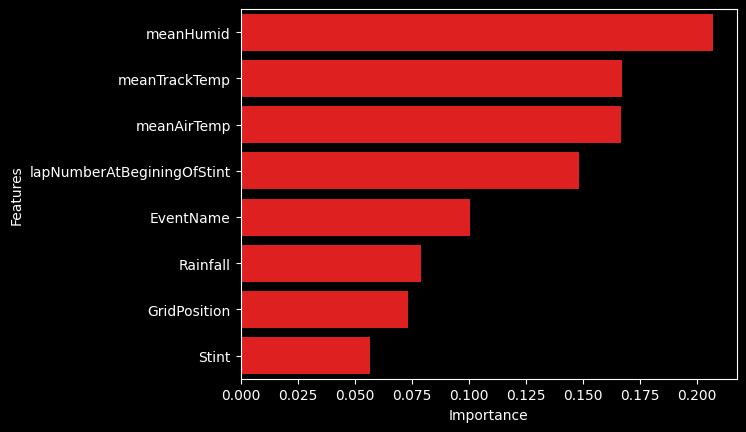

In [92]:
plt.style.use('dark_background')
sns.barplot( x=feature_scores,y=feature_scores.index,color='red')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Tunning the Hyperparameters of model Mannually

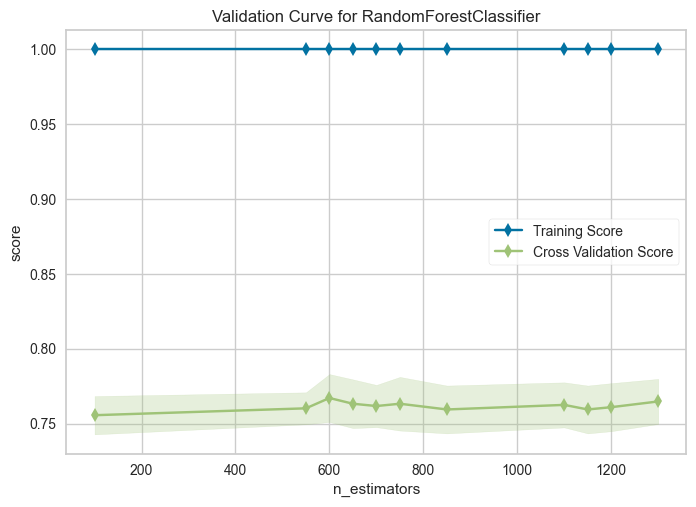

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  550,  600,  650,  700,  750,  850, 1100, 1150, 1200, 1300]),
                scoring='accuracy')


In [93]:
from yellowbrick.model_selection import validation_curve

n_est = [100,550,600,650,700,750,850,1100,1150,1200,1300]

print(validation_curve(RandomForestClassifier(), X=X_train, y=Y_train, param_name='n_estimators', param_range=n_est, scoring='accuracy', cv=3))

From above Graph best & optimal value for parameter "n_estimators" is 600

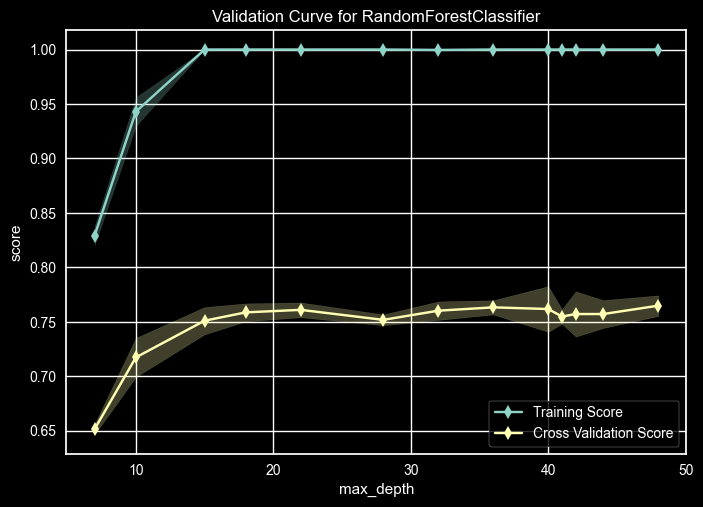

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([ 7, 10, 15, 18, 22, 28, 32, 36, 40, 41, 42, 44, 48]),
                scoring='accuracy')


In [94]:
depth_vals = [7,10,15,18,22,28,32,36,40,41,42,44,48]

plt.style.use('dark_background')
print(validation_curve(RandomForestClassifier(), X=X_train, y=Y_train, param_name='max_depth', param_range=depth_vals, scoring='accuracy', cv=3))

From above Graph best & optimal value for parameter "max_depth" is 22

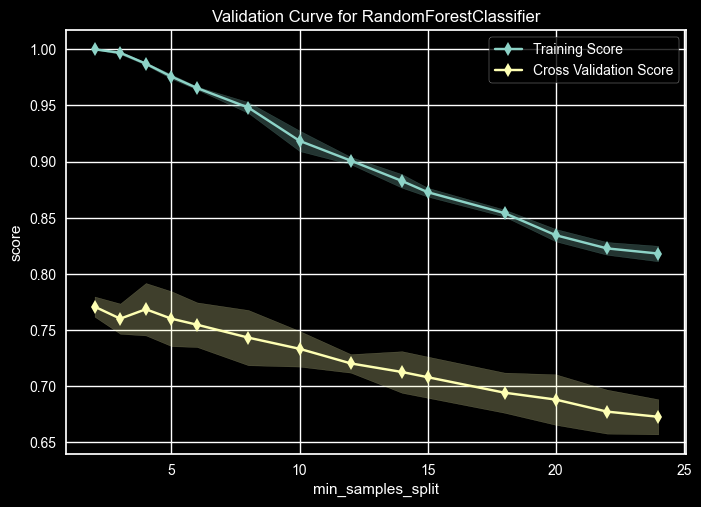

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=4, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 2,  3,  4,  5,  6,  8, 10, 12, 14, 15, 18, 20, 22, 24]),
                scoring='accuracy')


In [108]:
min_samples = [2,3,4,5,6,8,10,12,14,15,18,20,22,24]

plt.style.use('dark_background')
print(validation_curve(RandomForestClassifier(), X=X_train, y=Y_train, param_name='min_samples_split', param_range=min_samples, scoring='accuracy', cv=4))

From above Graph best & optimal value for parameter "min_samples_split" is 3

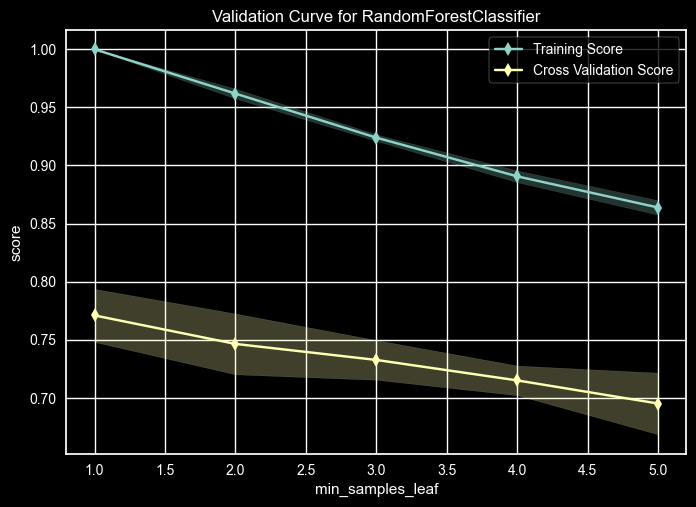

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(),
                param_name='min_samples_leaf',
                param_range=array([1, 2, 3, 4, 5]), scoring='accuracy')


In [109]:
min_leaf = [1,2,3,4,5]

print(validation_curve(RandomForestClassifier(),X=X_train,y=Y_train, param_name='min_samples_leaf', param_range=min_leaf, scoring='accuracy', cv=5))

From above Graph best & optimal value for parameter "min_samples_leaf" is 1

Now Training the Model with the Tunned parametes

In [110]:
model = RandomForestClassifier(n_estimators=600,max_depth=22,min_samples_split=3,max_features='sqrt',min_samples_leaf=1,random_state=0)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=22, min_samples_split=3, n_estimators=600,
                       random_state=0)

In [111]:
y_pred = model.predict(X_test)
print(y_pred)
print(f"Accuracy : {round(accuracy_score(y_pred,Y_test)*100,2)}%")

[2 2 2 3 2 2 3 1 2 2 2 3 1 2 2 2 2 2 3 2 5 2 2 1 2 1 2 3 6 2 3 1 1 2 4 3 5
 2 4 1 7 2 1 1 2 2 2 3 2 2 3 2 8 3 1 3 2 3 2 2 1 2 2 5 3 2 2 3 2 1 2 6 2 1
 2 1 1 2 5 3 3 2 3 2 8 1 4 3 3 1 3 2 5 2 2 1 3 2 3 3 3 2 4 3 4 2 5 2 3 1 6
 3 4 2 4 1 1 2 3 4 4 2 5 2 3 2 3 2 1 2 3 2 4 1 1 4 2 7 2 1 2 1 8 8 2 6]
Accuracy : 76.71%


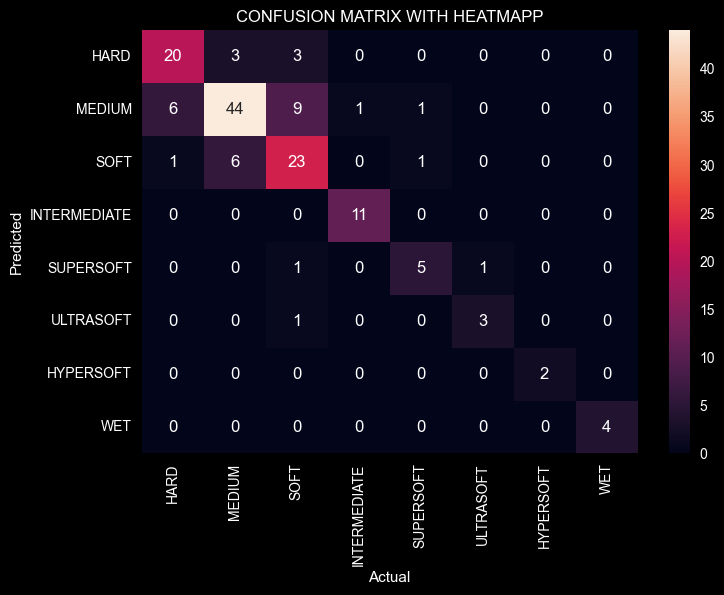

In [112]:
Tyres = ['HARD','MEDIUM','SOFT','INTERMEDIATE','SUPERSOFT','ULTRASOFT','HYPERSOFT','WET']
conf = confusion_matrix(y_pred,Y_test)
sns.heatmap(conf,annot=True,xticklabels=Tyres,yticklabels=Tyres)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("CONFUSION MATRIX WITH HEATMAPP")
plt.show()

In [113]:
def DecodeTarget(res) :
    if res == 1:
        print('HARD') 
    elif res == 2:
        print('MEDIUM') 
    elif res == 3:
        print('SOFT') 
    elif res == 4:
        print('INTERMEDIATE')
    elif res == 5:
        print('SUPERSOFT')
    elif res == 6:
        print('ULTRASOFT')
    elif res == 7:
        print('HYPERSOFT')
    elif res == 8:
        print('WET')

In [159]:
row = int(12)
input = X.loc[row , : ].values
print(f"inputs are : {input}")
print("Output should be : ")
DecodeTarget(Y[row])

inputs are : [ 0.     1.    26.116 29.948 63.748  0.     2.     1.   ]
Output should be : 
MEDIUM


In [160]:
pred = model.predict([[ 0.  ,   1.,    26.116 ,29.948, 63.748,  0.,     2.,     1.   ]])
print("Output is : ")
DecodeTarget(pred[0])

Output is : 
MEDIUM


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [116]:
from sklearn import tree

DTree = tree.DecisionTreeClassifier()
DTree.fit(X_train,Y_train)
pred_DTree = DTree.predict(X_test)
print(accuracy_score(Y_test,pred_DTree)*100)
pred_DTree

67.8082191780822


array([2, 2, 1, 3, 2, 2, 3, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 5, 2,
       2, 1, 2, 1, 3, 3, 6, 5, 3, 1, 1, 2, 4, 3, 5, 2, 4, 1, 7, 2, 1, 1,
       2, 2, 2, 3, 2, 2, 3, 2, 8, 3, 2, 3, 2, 3, 2, 3, 1, 2, 3, 5, 3, 2,
       3, 5, 2, 1, 2, 6, 2, 6, 2, 1, 1, 1, 5, 3, 3, 2, 3, 2, 8, 1, 4, 3,
       3, 1, 3, 2, 5, 2, 2, 1, 3, 2, 3, 3, 3, 2, 4, 3, 4, 1, 1, 2, 3, 2,
       6, 1, 3, 2, 4, 1, 1, 2, 4, 4, 4, 2, 5, 2, 3, 6, 3, 2, 1, 2, 3, 2,
       4, 1, 1, 4, 2, 7, 2, 2, 2, 1, 8, 8, 3, 6])

In [117]:
n_est = [100,250,350,450,600,750,900,1000]
min_samples_split = [1,2,3,4,5,6,8]
min_samples_leaf = [1,2,3,4,5]
max_depth = [2,8,14,20,22,28,32,35,40,42,45]
max_features = [0.2,0.4,0.6,0.8,1.0]
max_samples = [0.25,0.5,0.75,1.0]
bootstrap = [True,False]

In [118]:
parGrid = {
    'n_estimators': [100,200,350,500,650,900,1000,1200],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10,15,20,25,30,35,40, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

Using the GridSearchCV( ) or RandomizedSearchCV( ) to tune & find the bestparams for our model, to avoid overfitting and Obtain high accuracy 

In [132]:
rf_Model = RandomForestClassifier()

In [133]:
from sklearn.model_selection import RandomizedSearchCV

rf_Grid = RandomizedSearchCV(
                            estimator=rf_Model,
                            param_distributions=parGrid,
                            #using parGrid Dictionary we created above
                            scoring='accuracy'
                        )

In [134]:
rf_Grid.fit(X_train,Y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20, 25, 30, 35,
                                                      40, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 350, 500,
                                                         650, 900, 1000,
                                                         1200]},
                   scoring='accuracy')

In [135]:
print(rf_Grid.best_estimator_)
print(rf_Grid.best_score_*100)
rf_Grid.best_params_

RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=200)
75.47892720306514


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'gini',
 'class_weight': None,
 'bootstrap': True}

In [136]:
from sklearn.model_selection import cross_val_score

best_clf = rf_Grid.best_estimator_
scores = cross_val_score(best_clf, X_train, Y_train, cv=5, scoring='accuracy')
scores.mean()*100

75.63218390804597

In [137]:
best_train_pred = best_clf.predict(X_train)
best_test_pred = best_clf.predict(X_test)

print(f"Train Accuracy: {accuracy_score(best_train_pred,Y_train)*100}")
print(f"Test Accuracy: {accuracy_score(best_test_pred,Y_test)*100}")


Train Accuracy: 95.7088122605364
Test Accuracy: 76.02739726027397


Best Score is computed without OverFitting the model ✅☑️

##"best_clf" classified model

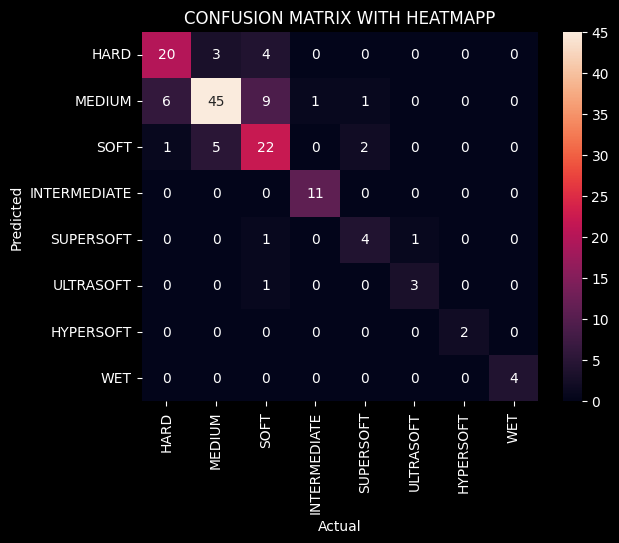

In [175]:
conf = confusion_matrix(best_clf.predict(X_test),Y_test)
sns.heatmap(conf,annot=True,xticklabels=Tyres,yticklabels=Tyres)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("CONFUSION MATRIX WITH HEATMAPP")
plt.show()

meanHumid                     0.206359
meanAirTemp                   0.162337
meanTrackTemp                 0.161451
lapNumberAtBeginingOfStint    0.156128
EventName                     0.104861
Rainfall                      0.090881
GridPosition                  0.060885
Stint                         0.057098
dtype: float64


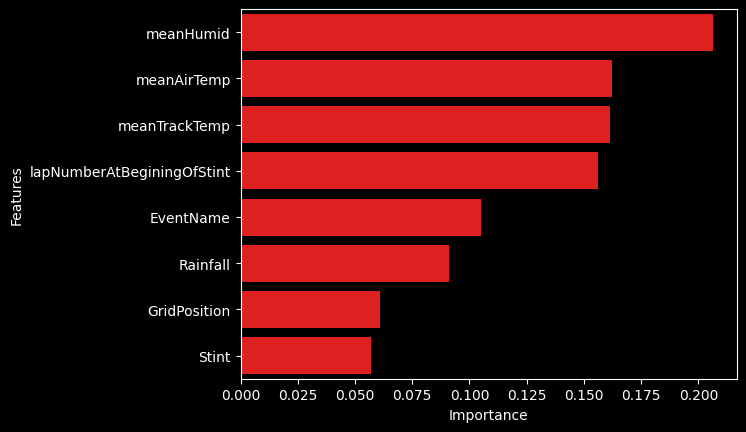

In [178]:
feature_scores = pd.Series(best_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_scores)
sns.barplot( x=feature_scores,y=feature_scores.index,color='red')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Our Best HyperTuned Model is "best_clf" (RandomForestClassifier)

In [176]:
# pickle.dump(best_clf, open('RF_Strategy.pkl','wb'))